# Gewöhnliche Differentialgleichungen

In [1]:
from Vector import Vector
from matplotlib import pyplot as plt, cm
from mpl_toolkits.mplot3d import Axes3D
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
%matplotlib inline


class DGL:
    def __init__(self, func, first_order=True):
        self.first_order = first_order
        self.func = func

    def __call__(self, x, y):
        if self.first_order:
            return self.func(x, y)
        else:
            return Vector(*(x for x in y[1:]), self.func(x, y))

    def euler(self, y, start, stop, steps):
        x = start
        for step in range(steps):
            delta = (stop - x)/(steps - step)
            yield (y := y + delta*self(x, y))
            x += delta

    def heun(self, y, start, stop, steps):
        x = start
        for step in range(steps):
            delta = (stop - x)/(steps - step)
            y_test = y + delta*self(x, y)
            y_mittel = (self(x, y) + self(x + delta, y_test))/2
            yield (y := y + delta*y_mittel)
            x += delta

In [2]:
f_1 = lambda x, y: Vector(2*y[1] - x*y[0], y[0]*y[1] - 2*x**3)
y_1 = Vector(0, 1)

solver = DGL(f_1, True)

Vector(3.0772906238582034, 2.0484890042723705)
Vector(3.9759203601530277, 4.9171214229362885)


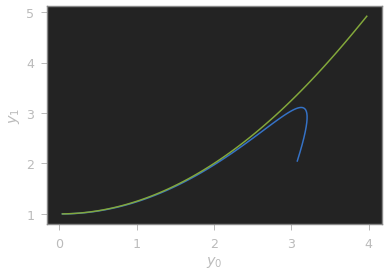

In [3]:
l = list(solver.euler(y=y_1, start=0, stop=2, steps=100))
ys_0 = [i[0] for i in l]
ys_1 = [i[1] for i in l]

print(repr(l[-1]))
plt.plot(ys_0, ys_1)

y_1 = Vector(0, 1)

l = list(solver.heun(y=y_1, start=0, stop=2, steps=100))
ys_0 = [i[0] for i in l]
ys_1 = [i[1] for i in l]



print(repr(l[-1]))
plt.plot(ys_0, ys_1)
plt.xlabel('$y_0$')
plt.ylabel('$y_1$')
plt.show()

Vector(3.9759203601530277, 4.9171214229362885)


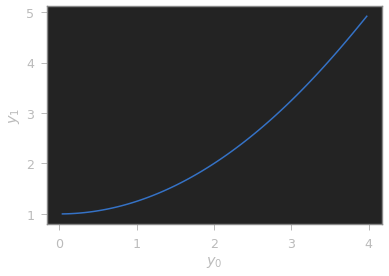

In [4]:
y_1 = Vector(0, 1)

l = list(solver.heun(y=y_1, start=0, stop=2, steps=100))
ys_0 = [i[0] for i in l]
ys_1 = [i[1] for i in l]



print(repr(l[-1]))
plt.plot(ys_0, ys_1)
plt.xlabel('$y_0$')
plt.ylabel('$y_1$')
plt.show()

In [5]:
f_2 = lambda x, y: 2*x*y[1]*y[2] + 2*y[0]**2*y[1]
y_2 = Vector(1, -1, 2)

solver = DGL(f_2, False)

In [6]:
for n in (10, 100, 1000, 10000):
    l_euler = list(solver.euler(y=y_2, start=1, stop=2, steps=n))
    l_heun = list(solver.heun(y=y_2, start=1, stop=2, steps=n))
    print(f"""
Abweichung beim Eulerverfahren n = {n}:
{0.5 - l_euler[-1][0]}
Abweichung beim Heunverfahren n = {n}:
{0.5 - l_heun[-1][0]}""")


Abweichung beim Eulerverfahren n = 10:
0.021456022203819314
Abweichung beim Heunverfahren n = 10:
0.000774740370562299

Abweichung beim Eulerverfahren n = 100:
0.002186450494016723
Abweichung beim Heunverfahren n = 100:
1.5650201611316916e-06

Abweichung beim Eulerverfahren n = 1000:
0.00021903017770241728
Abweichung beim Heunverfahren n = 1000:
1.062389759498572e-08

Abweichung beim Eulerverfahren n = 10000:
2.1906871310650722e-05
Abweichung beim Heunverfahren n = 10000:
1.0139050710122888e-10


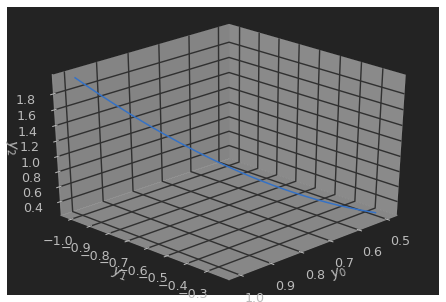

In [7]:
l = list(solver.heun(y=y_2, start=1, stop=2, steps=10000))
ys_0 = [i[0] for i in l]
ys_1 = [i[1] for i in l]
ys_2 = [i[2] for i in l]


fig = plt.figure()
ax = Axes3D(fig)
ax.plot(ys_0, ys_1, ys_2)
ax.set_xlabel('$y_0$')
ax.set_ylabel('$y_1$')
ax.set_zlabel('$y_2$')
ax.view_init(elev=30, azim=45)
plt.show()